In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker  
%matplotlib inline

Выбранный мною датасет демонстрирует ситуацию на рынке автомобилей в США. 
Каждая запись представляет продаваемый автомобиль со следующими параметрами:
цена, марка, модель, год выпуска, наличие страховки на случай утилизации, пробег в милях, цвет, VIN номер и другие..

In [3]:
data = pd.read_csv('./src/USA_cars_datasets.csv', index_col = 0)
data.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


Несложно заметить, что автомобили с большим пробегом стоят меньших денег.

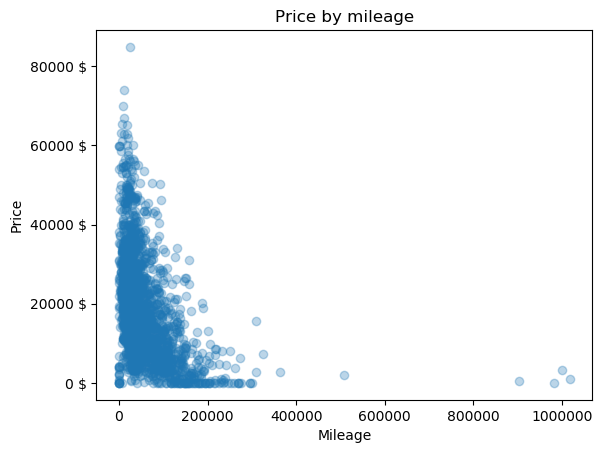

In [39]:
mileage_values = data.mileage.values
price_values = data.price.values

plt.scatter(mileage_values, price_values, alpha=0.3)
### REVIEW. Автор ревью: SorokinaIrina, дата ревью: 05/02/2021,
### Текст ревью: рекомендую добавить в функцию scatter параметр alpha (alpha = 0.3, к примеру), так будет лучше видна плотность точек.
### Текст ответа: Параметр добавлен, дата ревью: 05/02/2021
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price by mileage')

pass

Также наблюдается доминирование на рынке таких брендов, как Ford, Dodge и Shevrolet. Рынок всё таки американский) 
Удивил японский Nissan, компания не уступает местным брендам по количеству авто.

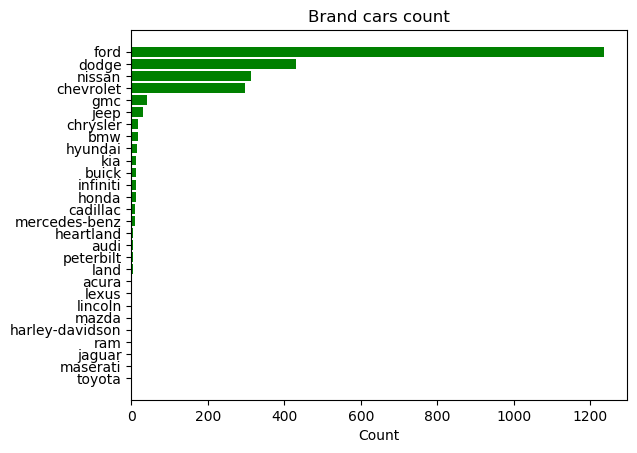

In [49]:
brand_values = np.unique(data.brand.values, return_counts=True)  
brands_count = len(brand_values[0]) 

plt.rcdefaults()
fig, ax = plt.subplots()

df = pd.DataFrame({
    'brands': brand_values[0],
    'counts': brand_values[1]
}).sort_values(by=['counts'])

brands = df.brands[::-1]
counts = df.counts[::-1]

positions = np.arange(brands_count)

ax.barh(positions, counts, align='center', color='green', ecolor='black')
ax.set_yticks(positions)
ax.set_yticklabels(brands)
ax.invert_yaxis()  
ax.set_xlabel('Count')
ax.set_title('Brand cars count')

plt.show()

Также фактом является то, что более новые машины стоят дороже.

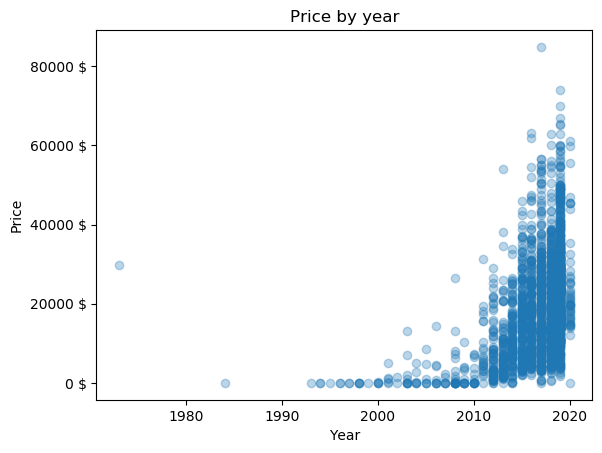

In [41]:
years_values = data.year.values

plt.scatter(years_values, price_values, alpha=0.3)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price by year')
pass